In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
img_height=48
img_width=48
batch_size=32

In [11]:
train_path='/content/drive/MyDrive/IOTprojectdataset/train'
test_path='/content/drive/MyDrive/IOTprojectdataset/test'

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 28829 files belonging to 7 classes.


In [13]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7191 files belonging to 7 classes.


In [14]:
class_names= train_ds.class_names
print(class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


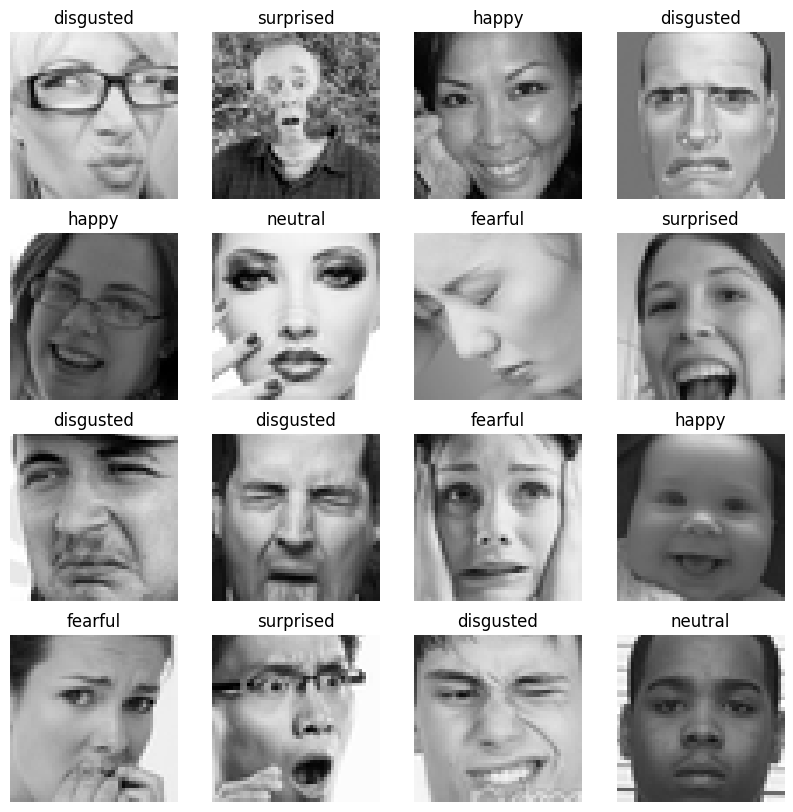

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [17]:
num_classes = len(class_names)


In [18]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.build(input_shape=(None, img_height, img_width, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)       

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/10
901/901 [==============================] - 3476s 4s/step - loss: 1.7574 - accuracy: 0.2760 - val_loss: 1.6367 - val_accuracy: 0.3570
Epoch 2/10
901/901 [==============================] - 7s 8ms/step - loss: 1.6225 - accuracy: 0.3615 - val_loss: 1.5090 - val_accuracy: 0.4173
Epoch 3/10
901/901 [==============================] - 5s 6ms/step - loss: 1.5269 - accuracy: 0.4033 - val_loss: 1.4026 - val_accuracy: 0.4663
Epoch 4/10
901/901 [==============================] - 6s 6ms/step - loss: 1.4615 - accuracy: 0.4314 - val_loss: 1.3635 - val_accuracy: 0.4810
Epoch 5/10
901/901 [==============================] - 7s 7ms/step - loss: 1.4128 - accuracy: 0.4556 - val_loss: 1.3393 - val_accuracy: 0.4860
Epoch 6/10
901/901 [==============================] - 6s 6ms/step - loss: 1.3766 - accuracy: 0.4680 - val_loss: 1.3062 - val_accuracy: 0.5009
Epoch 7/10
901/901 [==============================] - 7s 8ms/step - loss: 1.3476 - accuracy: 0.4820 - val_loss: 1.2821 - val_accuracy: 0.5047
Epoc

In [24]:
emotion1_url='https://st.focusedcollection.com/14026668/i/650/focused_263843708-stock-photo-portrait-smiling-man-black-white.jpg'
emotion1_path = tf.keras.utils.get_file('happy', origin=emotion1_url)

img = keras.preprocessing.image.load_img(
    emotion1_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to happy with a 96.87 percent confidence.


In [27]:
emotionold_url='https://i.pinimg.com/originals/1c/16/61/1c1661f1ce23ec85d6f4e603dd760a10.jpg'
emotionold_path = tf.keras.utils.get_file('happy_old', origin=emotionold_url)

img = keras.preprocessing.image.load_img(
    emotionold_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 17ms/step
This image most likely belongs to happy with a 35.21 percent confidence.


65602/65602 [==============================] - 0s 1us/step


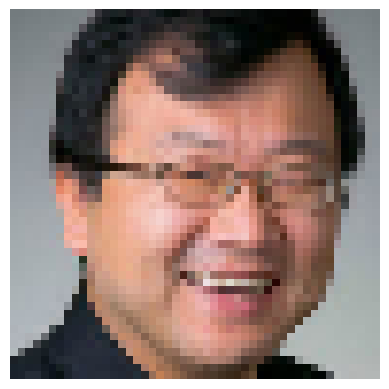

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to happy with a 86.58 percent confidence.


In [29]:
professor_url='https://sse.umkc.edu/profiles/profile-pictures/song-sejun2x-7c9ada6002c6bb692633c0dd014984b9.jpg'

professor_path = tf.keras.utils.get_file('happy_young', origin=professor_url)

img = keras.preprocessing.image.load_img(
    professor_path, target_size=(img_height, img_width)
)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

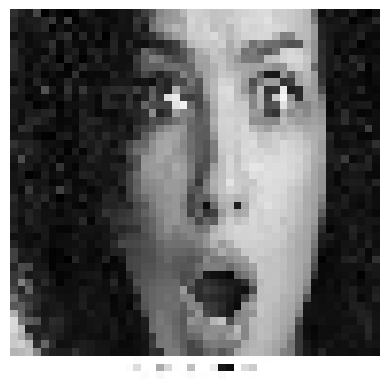

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to surprised with a 42.59% confidence.


In [49]:
image_path = '/content/surpriseyoung.webp'  

# Load the image
img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Perform the prediction on the image
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the predicted label and accuracy
class_index = np.argmax(score)
class_name = class_names[class_index]
accuracy = 100 * np.max(score)

# Print the predicted label and accuracy
print("This image most likely belongs to {} with a {:.2f}% confidence.".format(class_name, accuracy))
